In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Zomato data .csv")

In [4]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


# Convert the data types of column - rate

In [7]:
def handRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

df['rate'] = df['rate'].apply(handRate)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# Type of resturant

In [9]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


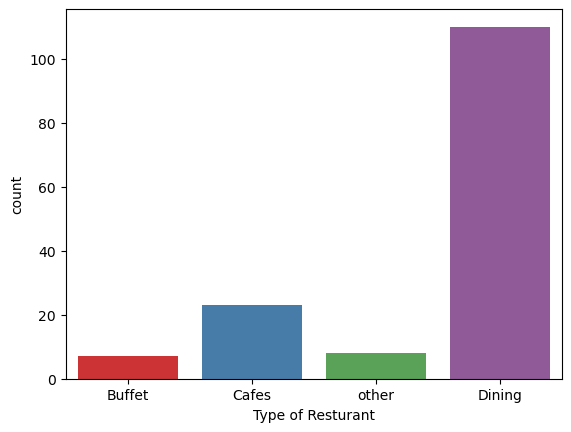

In [15]:
sns.countplot(x = df['listed_in(type)'], hue= 'listed_in(type)', palette='Set1', data = df)
plt.xlabel("Type of Resturant")
plt.show()

In [26]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum().reset_index()
#result = pd.DataFrame({'votes':grouped_data})

In [27]:
grouped_data

,listed_in(type),votes
0,Buffet,3028
1,Cafes,6434
2,Dining,20363
3,other,9367


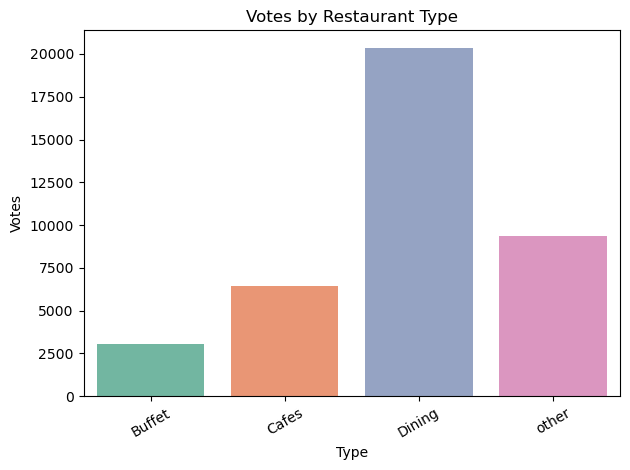

In [40]:
sns.barplot(data=grouped_data, x='listed_in(type)', y='votes', palette='Set2', hue= 'listed_in(type)', legend= False)
plt.title("Votes by Restaurant Type")
plt.ylabel("Votes")
plt.xlabel("Type")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

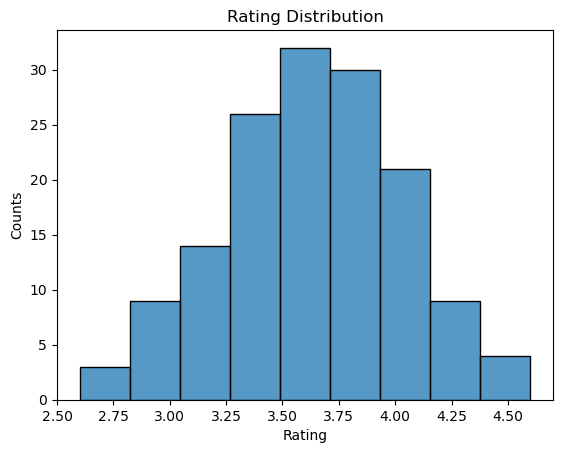

In [48]:
sns.histplot(df['rate'])
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Counts')
plt.show()

In [49]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


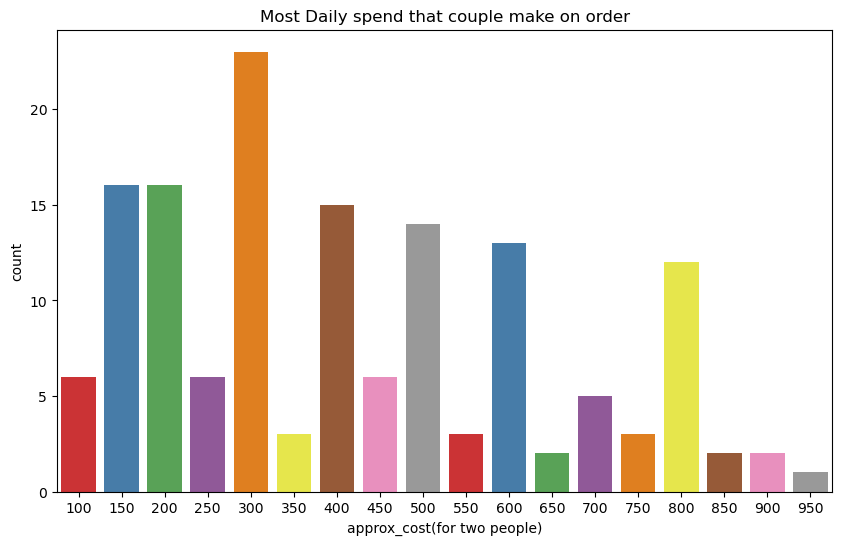

In [57]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df['approx_cost(for two people)'],hue = df['approx_cost(for two people)'],data = df, palette='Set1',legend = False)
plt.title("Most Daily spend that couple make on order")
plt.show()

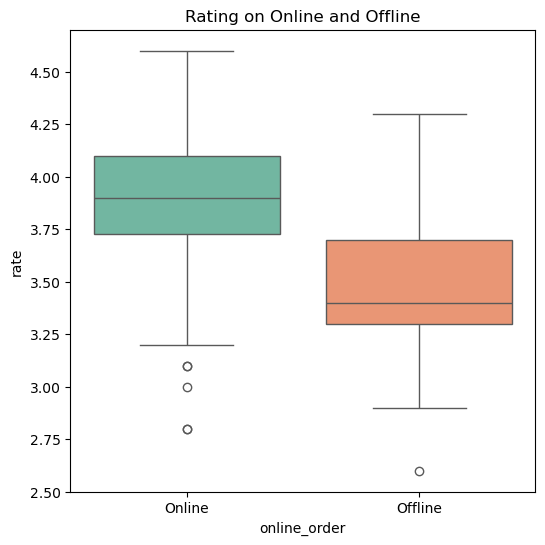

In [64]:
plt.figure(figsize = (6,6))
sns.boxplot(x='online_order', y = 'rate', data = df,palette='Set2',hue = 'online_order')
plt.xticks([0, 1], ['Online', 'Offline'])
plt.title('Rating on Online and Offline')
plt.show()

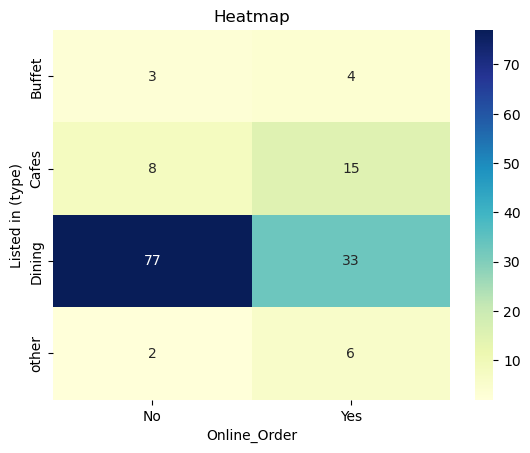

In [66]:
pivot_table = df.pivot_table(index = 'listed_in(type)', columns = 'online_order', aggfunc = 'size', fill_value=0)
sns.heatmap(pivot_table, annot = True , cmap = "YlGnBu", fmt = 'd')
plt.title('Heatmap')
plt.xlabel('Online_Order')
plt.ylabel('Listed in (type)')
plt.show()

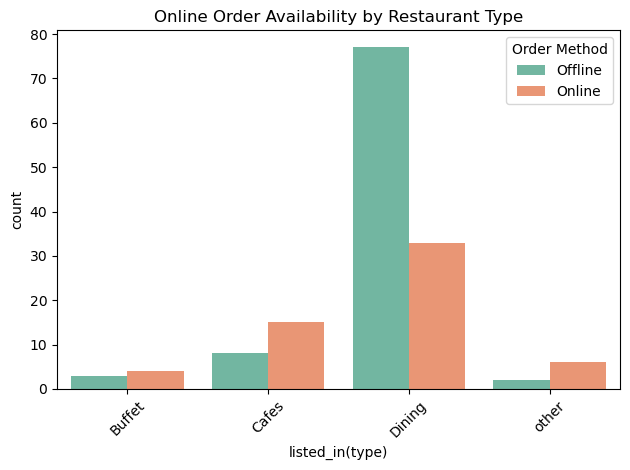

In [74]:
# Step 1: Group your data
df_grouped = df.groupby(['listed_in(type)', 'online_order']).size().reset_index(name='count')

# Step 2: Create the barplot
ax = sns.barplot(data=df_grouped, x='listed_in(type)', y='count', hue='online_order', palette='Set2')

# Step 3: Rotate x-axis labels
plt.xticks(rotation=45)

# ✅ Step 4: Fix the legend — get handles and set custom labels while keeping colors
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Offline', 'Online'], title='Order Method')

# Step 5: Title and layout
plt.title("Online Order Availability by Restaurant Type")
plt.tight_layout()
plt.show()

In [68]:
df_grouped

,listed_in(type),online_order,count
0,Buffet,No,3
1,Buffet,Yes,4
2,Cafes,No,8
3,Cafes,Yes,15
4,Dining,No,77
5,Dining,Yes,33
6,other,No,2
7,other,Yes,6
